# Chapter 4: Training Models

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Linear Regression

*Equation 4-1. Linear Regression model prediction*

$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$$  

where:
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the ith feature value.
- $\theta_j$ is the jth model parameter (including the bias term $\theta_0$ and the feature weights)

*Equation 4-2. Linear Regression model prediction (vectorized form)*

$$ \hat{y} = h_\theta(x) = \vec{\theta} \cdot \vec{x} $$

where:
- $\vec{\theta}$ is the model's parameter vector
- $\vec{x}$ is the instance's feature vector, with $x_0$ always equal to 1
- $h_\theta$ is the hypothesis function

> Note: Vectors are often represented as *column vectors* so prediction is $\hat{y} = \theta^T x$, (matrix multiplication).  

To measure how well (or poorly) the model fits to the training data, find the value of $\theta$ that minimizes the Root Mean Square Error (RMSE) / Mean Squared Error (MSE) - value that minimizes the function also minimizes the square root.

*Equation 4-3. MSE cost function function for a Linear Regression model*

$$ MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})^2$$

### 4.1.1 The Normal Equation

The `Normal Equation` is a closed-form solution that minimizes the cost function and finds the value of $\theta$.

*Equation 4-4. Normal Equation*

$$ \hat{\theta} = (X^T X)^{-1} X^T \vec{y}$$

where:
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $\vec{y}$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

Let's generate some linear-looking data to test this equation.

In [2]:
import numpy as np

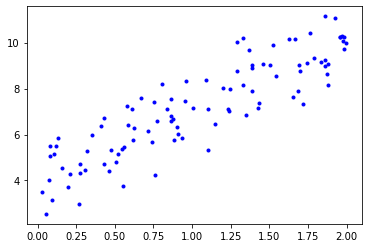

In [7]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.show()

Compute $\hat{\theta}$ using Normal Equation and `inv()` from NumPy's linear algebra module (`np.linalg`) to compute the inverse of a matrix.

In [12]:
# np.c_ concatenates along vertical axis (columns) 1's vector + X vector
# Use @ for matrix multiplication, much clearer to read than .dot()
# X_b = 'X bias' as it includes the bias term

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T@X_b) @ X_b.T @ y
theta_best

array([[4.05108047],
       [3.01735026]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.05108047],
       [10.08578099]])

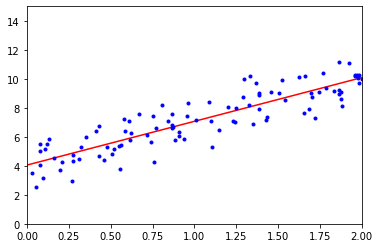

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.05108047]), array([[3.01735026]]))

In [17]:
lin_reg.predict(X_new)

array([[ 4.05108047],
       [10.08578099]])

> Note: Scikit-Learn separates the bias term (`intercept_`) from the feature weights (`coef_`).

`LinearRegression` class is based on `scipy.linalg.lstsq()` ("least squares").

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.05108047],
       [3.01735026]])

This function computes $\hat{\theta} = X^+ \vec{y}$, where $X^+$ is the pseudoinverse of $X$. Use `np.linalg.pinv()` to compute the pseudoinverse directly.

In [19]:
np.linalg.pinv(X_b) @ y

array([[4.05108047],
       [3.01735026]])

The pseudoinverse is computed using *Singular Value Decomposition (SVD)*. This approach is more efficient than computing the Normal Equation.

> Note: The Normal Equation may not work if the matrix $X^T X$ is not invertible (singular), such as if $m<n$ or if some features are redundant, but the pseudoinverse is always defined.

### 4.1.2 Computational Complexity

The Normal Equation computes the inverse $X^T X$, $ (n+1) \times (n+1)$ matrix. The *computational complexity* of inverting such a matrix is typically $O(n^{2.4})$ - $O(n^3)$. So if you double the number of features, you multiply the computation by roughly 5.3 to 8.

The SVD approach used by Scikit-Learn's `LinearRegression` is about $O(n^2)$.

> Note: Both the Normal Equation and SVD get very slow when the number of features grows large (100,000). But both are linear ($O(m)$) to the number of instances in the training set so they handle large training sets efficiently.
Ie. $\uparrow$n features, slower performance. $\uparrow$m examples, still efficient.

## 4.2 Gradient Descent

### 4.2.1 Batch Gradient Descent

### 4.2.2 Stochastic Gradient Descent

### 4.2.3 Mini-batch Gradient Descent

## 4.3 Polynomial Regression

## 4.4 Learning Curves

## 4.5 Regularized Linear Models

### 4.5.1 Ridge Regression

### 4.5.2 Lasso Regression

### 4.5.3 Elastic Net

### 4.5.4 Early Stopping

## 4.6 Logistic Regression

### 4.6.1 Estimating Probabilities

### 4.6.2 Training and Cost Function

### 4.6.3 Decision Boundaries

### 4.6.4 Softmax Regression